In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from absl import logging
logging.set_verbosity(logging.ERROR)

In [2]:

    
csv_file_path = 'Gemini_BTCEUR_d.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path, skiprows=[0])
# Display the DataFrame


In [3]:
df

,unix,date,symbol,open,high,low,close,Volume BTC,Volume EUR
0,1714694400000,2024-05-03 00:00:00,BTC/EUR,55202.52,59309.74,55116.10,58550.01,2.677121,156745.442000
1,1714608000000,2024-05-02 00:00:00,BTC/EUR,53655.68,55563.72,53569.97,55202.52,0.574484,31712.979956
2,1714521600000,2024-05-01 00:00:00,BTC/EUR,56390.86,57248.39,53157.30,53655.68,4.231182,227026.944731
3,1714435200000,2024-04-30 00:00:00,BTC/EUR,59719.37,59719.37,55500.00,56390.86,1.274757,71884.641265
4,1714348800000,2024-04-29 00:00:00,BTC/EUR,58841.90,59719.37,57100.00,59719.37,2.511821,150004.350951
...,...,...,...,...,...,...,...,...,...
1637,1603857600000,2020-10-28 04:00:00,BTC/EUR,0.00,11441.37,0.00,11153.76,0.471273,5256.460917
1638,1603771200000,2020-10-27 04:00:00,BTC/EUR,0.00,0.00,0.00,0.00,0.000000,0.000000
1639,1603684800000,2020-10-26 04:00:00,BTC/EUR,0.00,0.00,0.00,0.00,0.000000,0.000000
1640,1603598400000,2020-10-25 04:00:00,BTC/EUR,0.00,0.00,0.00,0.00,0.000000,0.000000


In [4]:
columns_to_drop = ['symbol','unix', 'Volume EUR', 'Volume BTC', 'high', 'open', 'low']
df = df[df['close'] != 0]

df.drop(columns=columns_to_drop, inplace=True)
df

/tmp/ipykernel_23512/3768464653.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=columns_to_drop, inplace=True)


,date,close
0,2024-05-03 00:00:00,58550.01
1,2024-05-02 00:00:00,55202.52
2,2024-05-01 00:00:00,53655.68
3,2024-04-30 00:00:00,56390.86
4,2024-04-29 00:00:00,59719.37
...,...,...
1633,2020-11-01 04:00:00,11794.98
1634,2020-10-31 04:00:00,11902.44
1635,2020-10-30 04:00:00,11602.24
1636,2020-10-29 04:00:00,11605.42


/tmp/ipykernel_23512/3707028640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


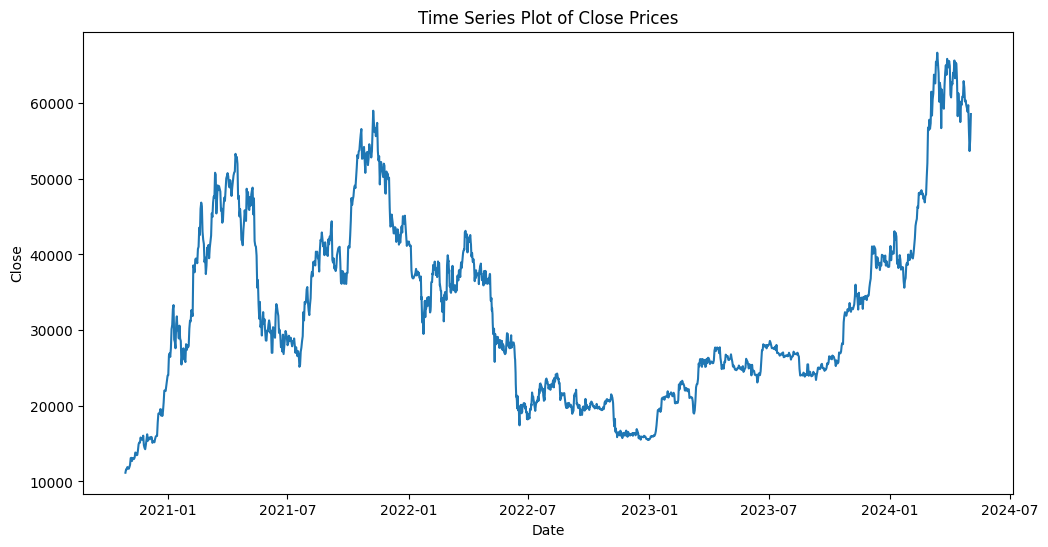

In [5]:
df['date'] = pd.to_datetime(df['date'])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Time Series Plot of Close Prices')
plt.show()

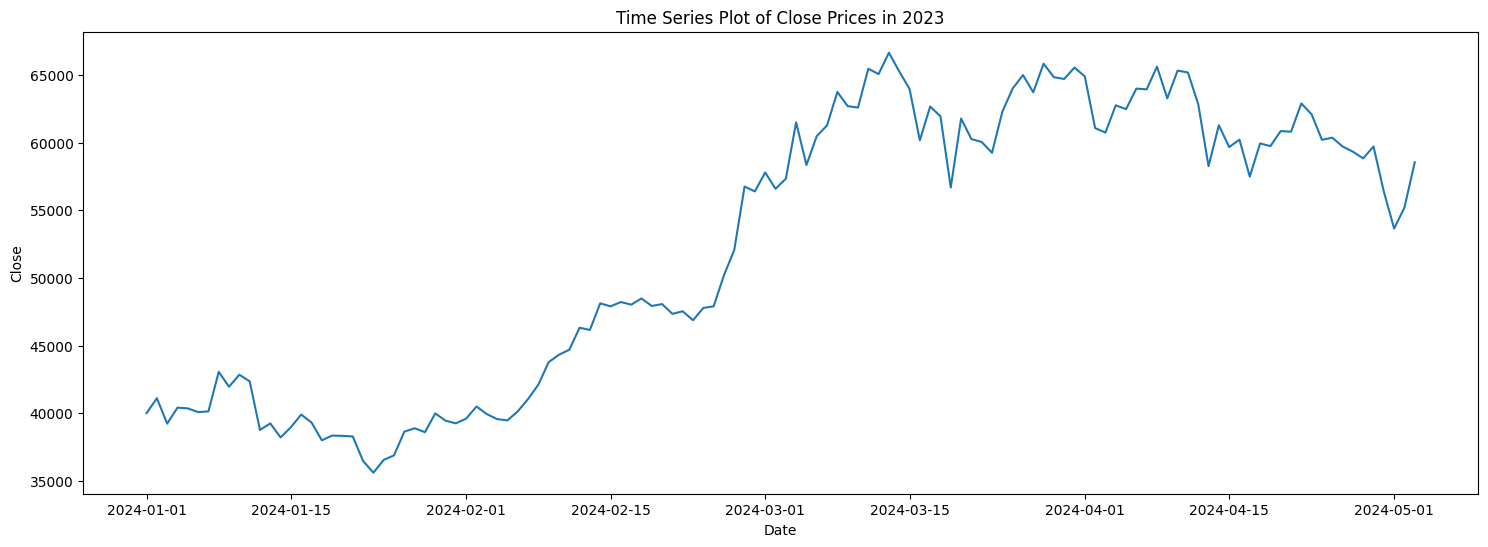

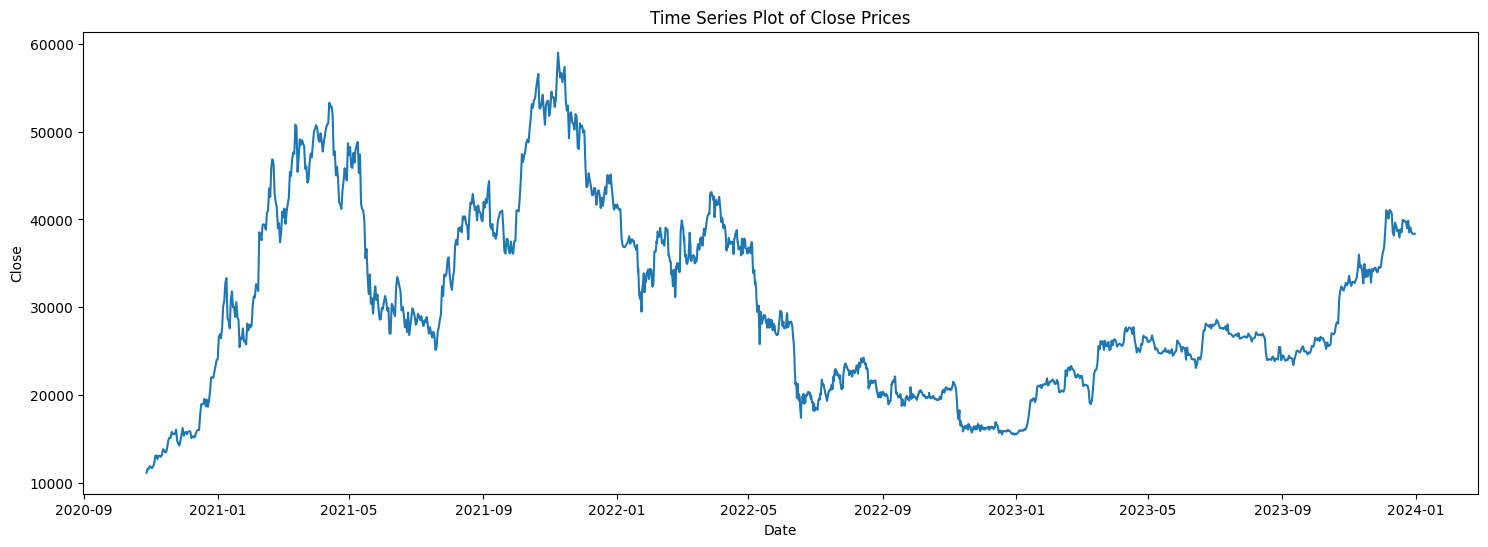

In [6]:
test_set = df[df['date'].dt.year == 2024]

# Training set
train_set = df[df['date'].dt.year != 2024]
# Plotting
plt.figure(figsize=(18, 6))
plt.plot(test_set['date'], test_set['close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Time Series Plot of Close Prices in 2023')
plt.show()

plt.figure(figsize=(18, 6))
plt.plot(train_set['date'], train_set['close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Time Series Plot of Close Prices')
plt.show()

In [7]:
valid = np.array(test_set['close'])
train = np.array(train_set['close'])

valid = valid[::-1]
train = train[::-1]

In [8]:
def plot_time_series(data):
    indices = np.arange(len(data))
    
    plt.figure(figsize=(10, 6))
    plt.plot(indices, data, label='Time Series Data')
    plt.title('Time Series Plot')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()


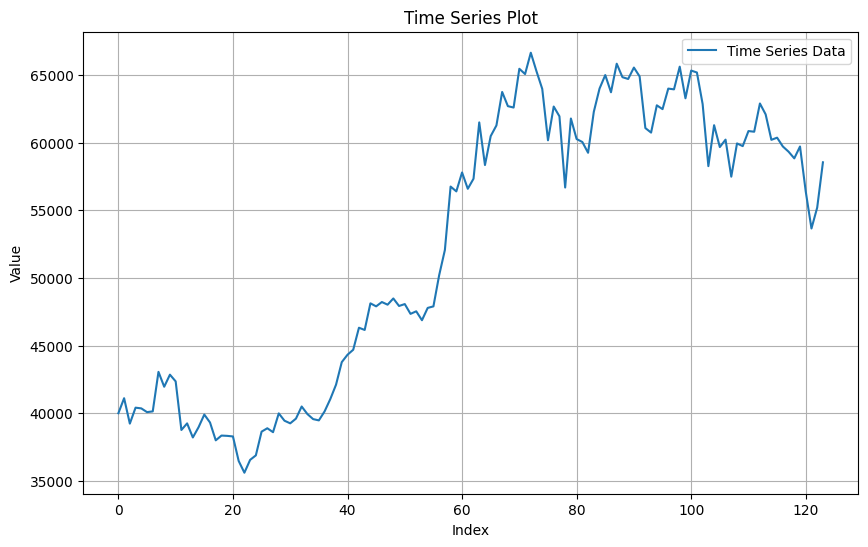

In [9]:
plot_time_series (valid)

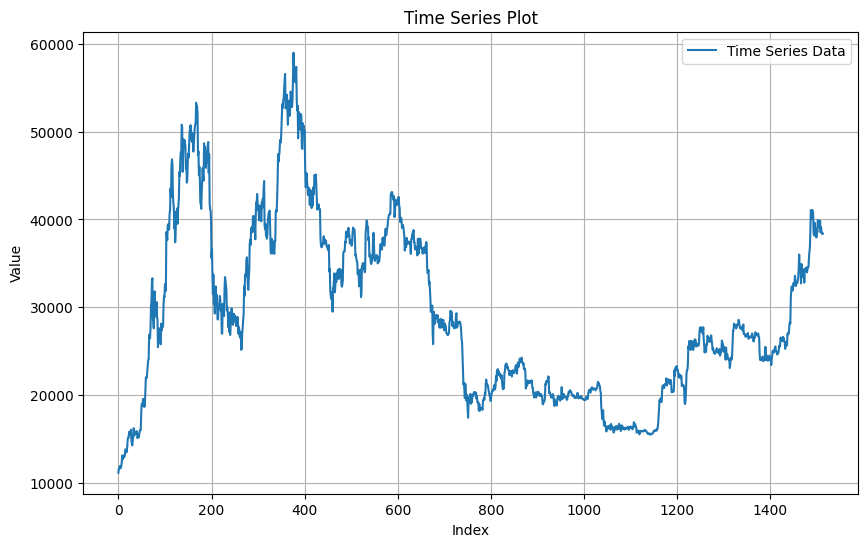

In [10]:
plot_time_series (train)

In [11]:
def normalize_data(train_data, valid_data, lower_percent, upper_percent):
    """
    Normalize training and validation data to a custom range where a certain percentage is mapped to values less than zero.
    
    Parameters:
    train_data (array-like): The training data to be normalized.
    valid_data (array-like): The validation data to be normalized.
    lower_percent (float): The percentage of the range to map to values less than zero.
    upper_percent (float): The percentage of the range to map to values greater than zero.
    
    Returns:
    tuple: A tuple containing the normalized training and validation data.
    """
    min_val = min(train_data)
    max_val = max(train_data)
    range_of_values = np.ptp(train_data) 
    min_val = min_val - range_of_values*5
    max_val = max_val + range_of_values*5
    normalized_train_data = [(x - min_val) / (max_val - min_val) for x in train_data]
    normalized_valid_data = [(x - min_val) / (max_val - min_val) for x in valid_data]
    return normalized_train_data, normalized_valid_data

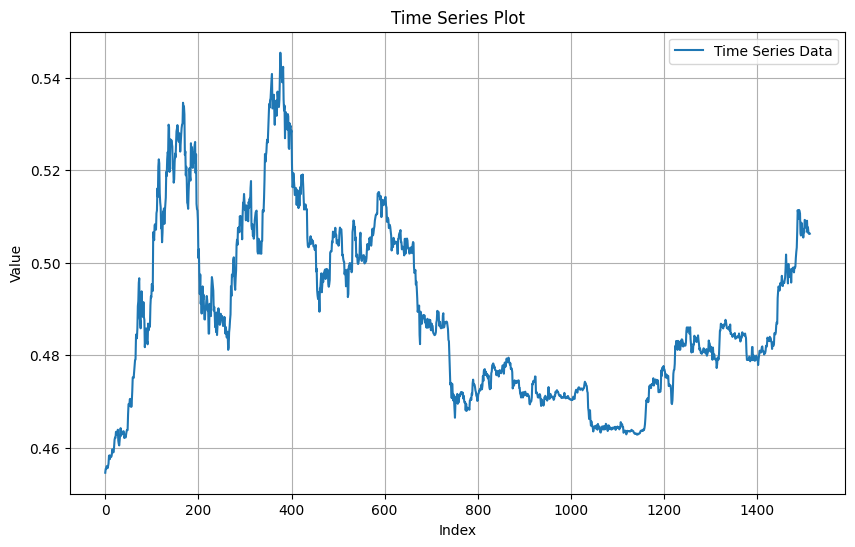

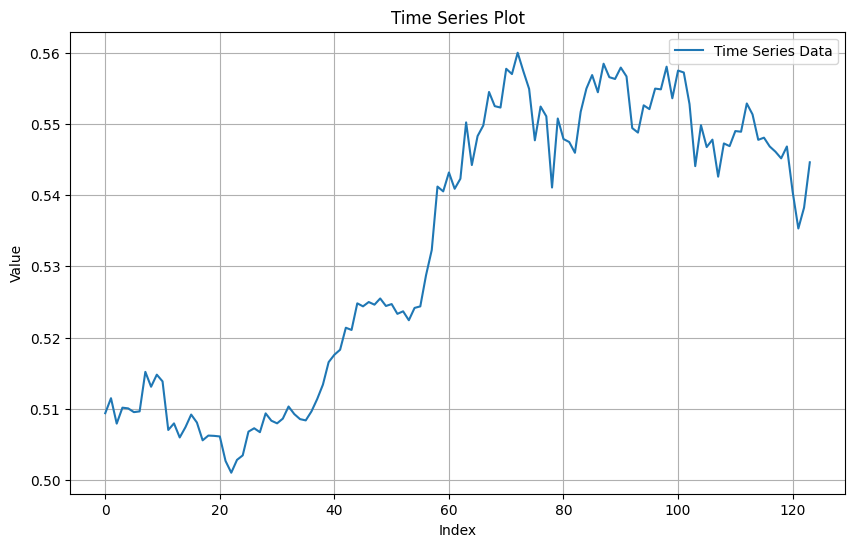

In [12]:
lower_percent = 5
upper_percent = 5

x_train_reshaped = train.reshape(-1, 1)
x_valid_reshaped = valid.reshape(-1, 1)

x_train_reshaped, x_valid_reshaped = normalize_data(x_train_reshaped, x_valid_reshaped, lower_percent , upper_percent)

plot_time_series(x_train_reshaped)
plot_time_series(x_valid_reshaped)

In [13]:
window_size = 30

x_train_window =[]
y_train_window =[]
x_valid_window =[]
y_valid_window =[]

x_train_reshaped = np.array(x_train_reshaped)
x_valid_reshaped = np.array(x_valid_reshaped)

for i in range (window_size, x_train_reshaped.shape[0]):
    x_train_window.append(x_train_reshaped[i-window_size:i, 0])
    y_train_window.append(x_train_reshaped[i, 0])



for i in range (window_size,x_valid_reshaped.shape[0] ):
  x_valid_window.append(x_valid_reshaped[i-window_size:i,0])
  y_valid_window.append(x_valid_reshaped[i,0])

X_train, y_train, X_valid, y_valid = np.array(x_train_window), np.array(y_train_window), np.array(x_valid_window), np.array(y_valid_window)

In [14]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout
from keras.optimizers import Adam
from keras.metrics import MeanAbsoluteError
from keras.callbacks import ModelCheckpoint
import itertools
import os
from tqdm import tqdm  # Import tqdm for progress bar

# Define the hyperparameters you want to iterate over
activations = ['relu', 'tanh']
num_of_layers = [0, 1, 2, 3, 4, 5]
units = 50
dropout_rate = 0.2
epochs = 1000

# Loop over the combinations
for activation, num_layers in itertools.product(activations, num_of_layers):
    history_file_path = f'training_history_{num_layers}_{units}_{activation}.csv'
    if os.path.exists(history_file_path):
        print(f"Training history already exists for Activation={activation}, Num Layers={num_layers}. Skipping...")
        continue

    print(f"Training Neural Network: Activation={activation}, Num Layers={num_layers}")
    # Initialising the RNN
    regressor = Sequential()

    # Adding the first SimpleRNN layer and some Dropout regularisation
    regressor.add(SimpleRNN(units=units, input_shape=(X_train.shape[1], 1), activation=activation, return_sequences=True))
    regressor.add(Dropout(dropout_rate))

    # Adding more SimpleRNN layers
    for _ in range(num_layers - 1):
        regressor.add(SimpleRNN(units=units, activation=activation, return_sequences=True))
        regressor.add(Dropout(dropout_rate))

    regressor.add(SimpleRNN(units=units, activation=activation))
    regressor.add(Dropout(dropout_rate))
    # Adding the output layer
    regressor.add(Dense(units=1))

    # Compile the model with Adam optimizer and specific learning rate
    optimizer = Adam()
    regressor.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[MeanAbsoluteError()])

    # Define a ModelCheckpoint callback to save the best model
    checkpoint = ModelCheckpoint(f'best_model_SimpleRNN_{num_layers}_{units}_{activation}.keras', monitor='val_mean_absolute_error', mode='min', save_best_only=True)

    # Fitting the RNN to the Training set with the ModelCheckpoint callback
    progress_bar = tqdm(total=epochs, desc=f"Progress: Activation={activation}, Num Layers={num_layers}", position=0, leave=True)
    for epoch in range(epochs):
        history = regressor.fit(X_train, y_train, epochs=1, batch_size=64, validation_data=(X_valid, y_valid), verbose=0, callbacks=[checkpoint])
        progress_bar.update(1)  # Update the progress bar
        progress_bar.set_postfix(loss=history.history['loss'][0], val_loss=history.history['val_loss'][0])
    progress_bar.close()

    history_df = pd.DataFrame({
        'epoch': range(1, len(history.history['loss']) + 1),
        'loss': history.history['loss'],
        'val_loss': history.history['val_loss'],
        'mean_absolute_error': history.history['mean_absolute_error'],
        'val_mean_absolute_error': history.history['val_mean_absolute_error']
    })
    history_df.to_csv(f'training_history_{num_layers}_{units}_{activation}.csv', index=False)


2024-05-04 17:46:59.297907: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-04 17:46:59.303651: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-04 17:46:59.369109: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-04 17:47:02.216413: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Training history already exists for Activation=relu, Num Layers=0. Skipping...
Training history already exists for Activation=relu, Num Layers=1. Skipping...
Training history already exists for Activation=relu, Num Layers=2. Skipping...
Training history already exists for Activation=relu, Num Layers=3. Skipping...
Training Neural Network: Activation=relu, Num Layers=4


2024-05-04 17:47:05.221436: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-04 17:47:05.222655: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/p/pakrit/pytorchRL/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Training Neural Network: Activation=relu, Num Layers=5


Progress: Activation=relu, Num Layers=5: 100%|██████████| 1000/1000 [20:19<00:00,  1.22s/it, loss=1.73e-5, val_loss=0.00216]


Training history already exists for Activation=tanh, Num Layers=0. Skipping...
Training history already exists for Activation=tanh, Num Layers=1. Skipping...
Training history already exists for Activation=tanh, Num Layers=2. Skipping...
Training history already exists for Activation=tanh, Num Layers=3. Skipping...
Training Neural Network: Activation=tanh, Num Layers=4


Progress: Activation=tanh, Num Layers=4: 100%|██████████| 1000/1000 [18:07<00:00,  1.09s/it, loss=8.94e-6, val_loss=8.9e-5]  


Training Neural Network: Activation=tanh, Num Layers=5


Progress: Activation=tanh, Num Layers=5: 100%|██████████| 1000/1000 [21:37<00:00,  1.30s/it, loss=5.19e-5, val_loss=0.000531]


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1026e-05 - mean_absolute_error: 0.0024  
Model Number of Layers: 0, activation : relu
Validation Loss: 1.2563886230054777e-05
Validation Mean Absolute Error: 0.002569003263488412
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


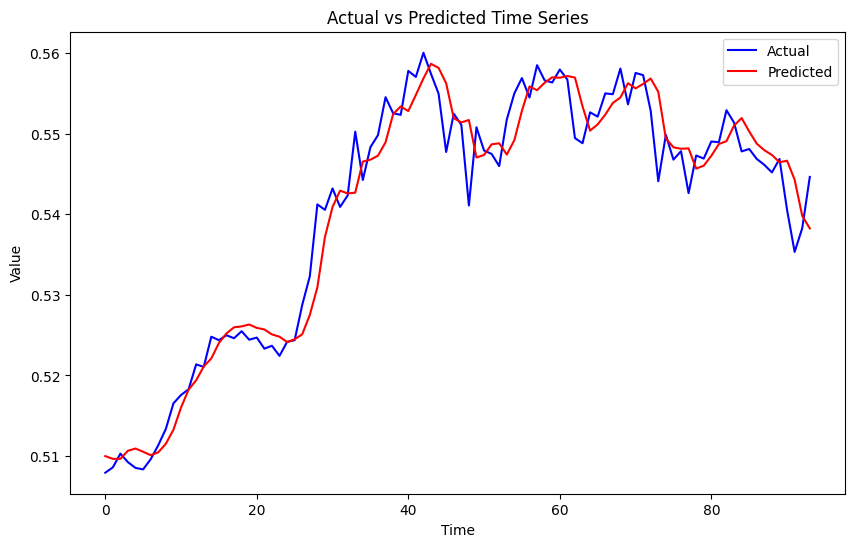

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0701e-05 - mean_absolute_error: 0.0023  
Model Number of Layers: 1, activation : relu
Validation Loss: 1.2206773135403637e-05
Validation Mean Absolute Error: 0.0025557850021868944
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


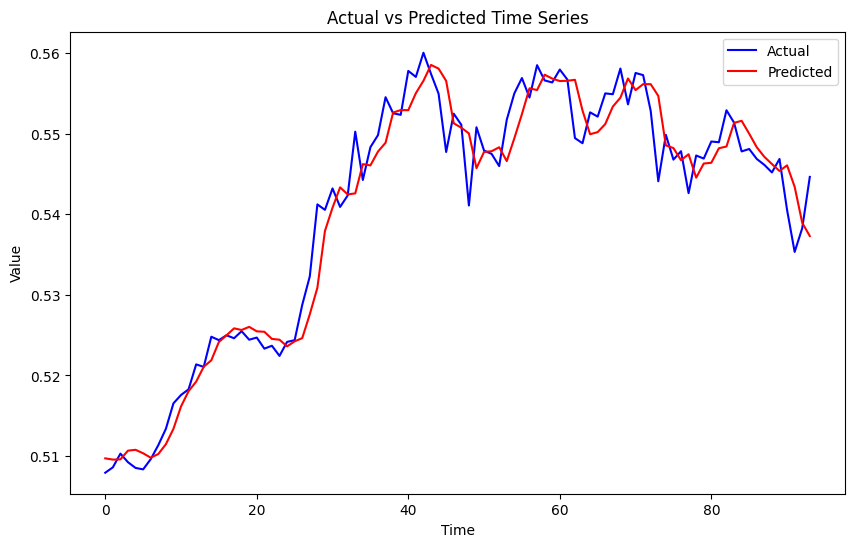

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.0462e-05 - mean_absolute_error: 0.0045 
Model Number of Layers: 2, activation : relu
Validation Loss: 3.0435790904448368e-05
Validation Mean Absolute Error: 0.0046477471478283405
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7f2b75addab0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━

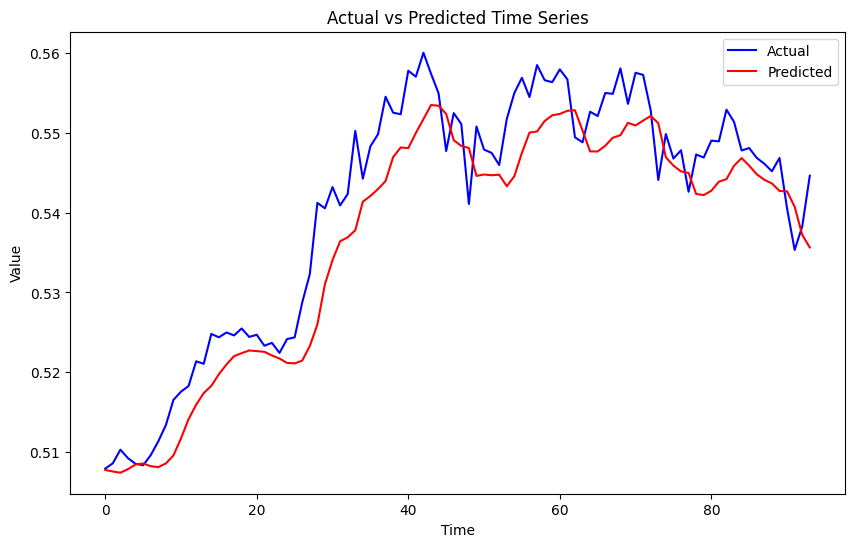

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.2531e-04 - mean_absolute_error: 0.0173
Model Number of Layers: 3, activation : relu
Validation Loss: 0.0003687796415761113
Validation Mean Absolute Error: 0.01855272613465786
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 242ms/step


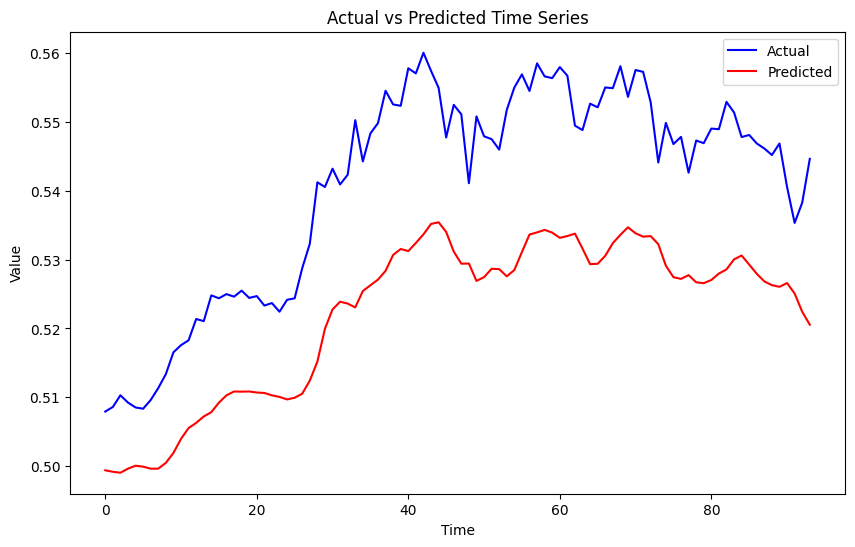

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.7655e-04 - mean_absolute_error: 0.0230 
Model Number of Layers: 4, activation : relu
Validation Loss: 0.000669253699015826
Validation Mean Absolute Error: 0.025039497762918472
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 253ms/step


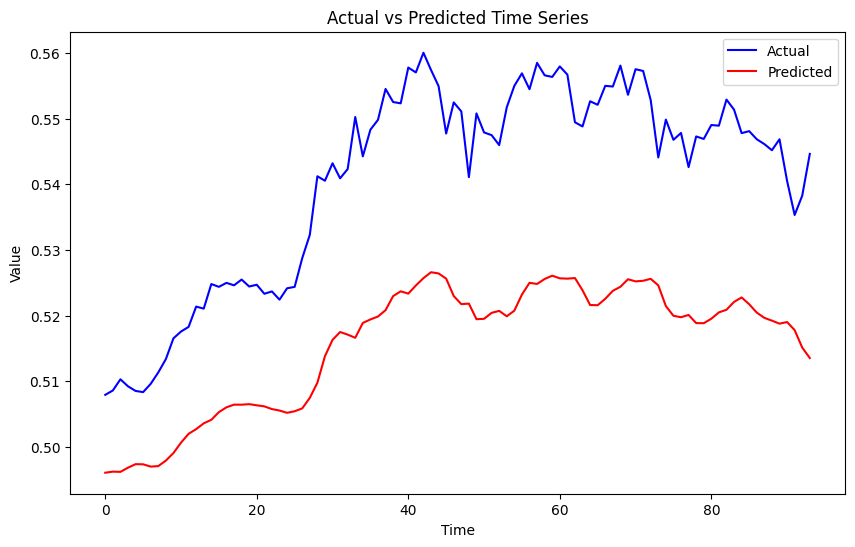

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012 - mean_absolute_error: 0.0329     
Model Number of Layers: 5, activation : relu
Validation Loss: 0.001341280760243535
Validation Mean Absolute Error: 0.0355108380317688
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 306ms/step


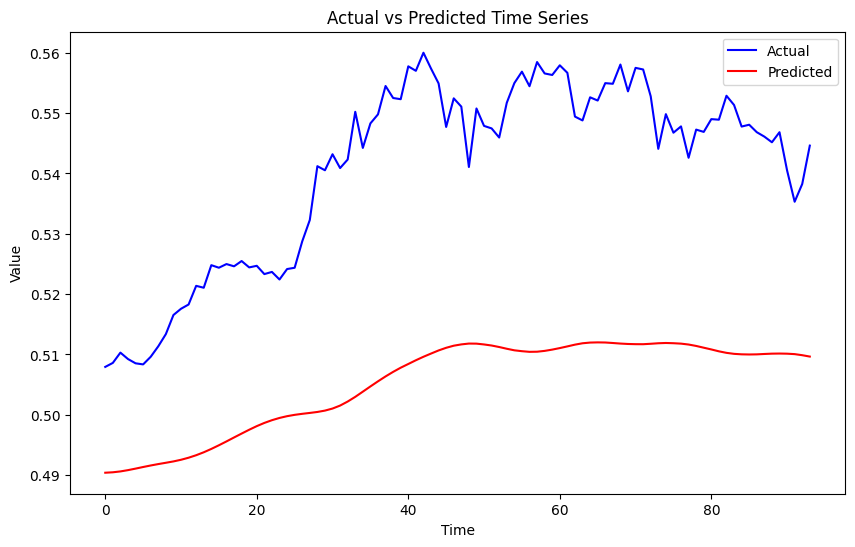

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0341e-05 - mean_absolute_error: 0.0023  
Model Number of Layers: 0, activation : tanh
Validation Loss: 1.1697089576045983e-05
Validation Mean Absolute Error: 0.0025379937142133713
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


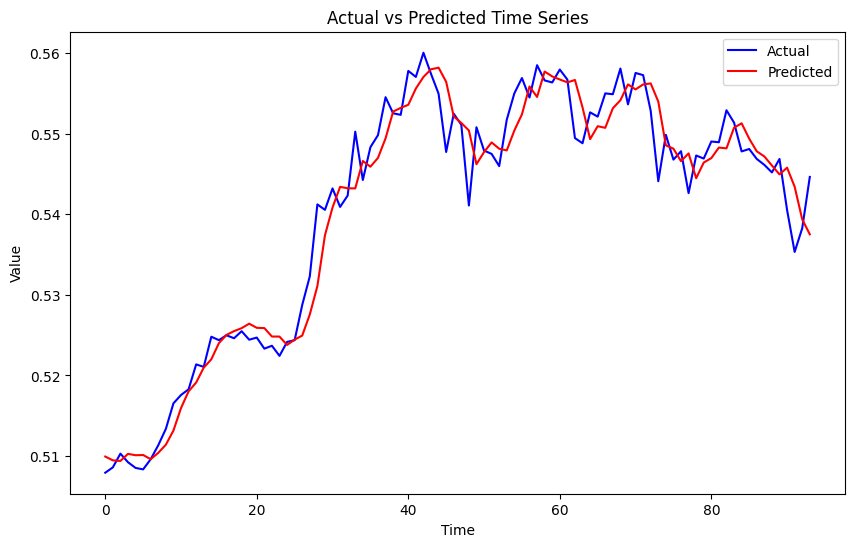

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0684e-05 - mean_absolute_error: 0.0023  
Model Number of Layers: 1, activation : tanh
Validation Loss: 1.2283778232813347e-05
Validation Mean Absolute Error: 0.002539408393204212
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


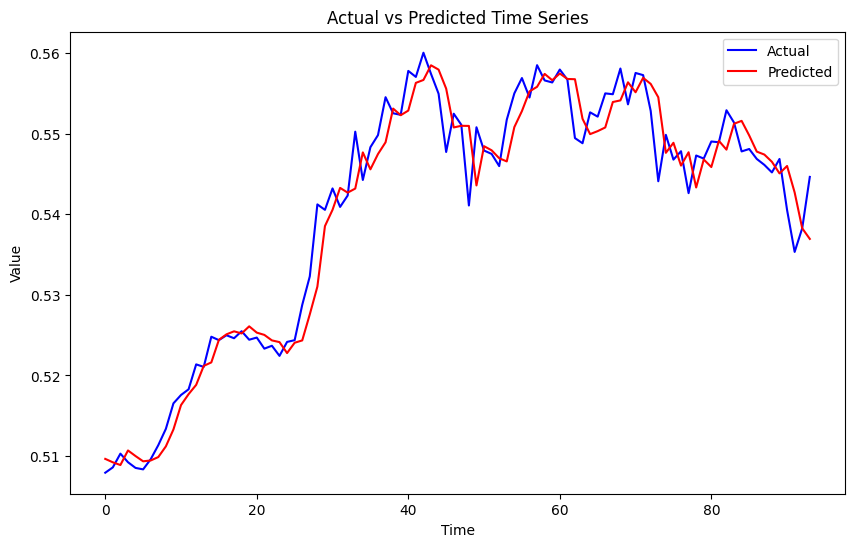

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.8651e-06 - mean_absolute_error: 0.0023  
Model Number of Layers: 2, activation : tanh
Validation Loss: 1.1550508133950643e-05
Validation Mean Absolute Error: 0.002563535002991557
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step


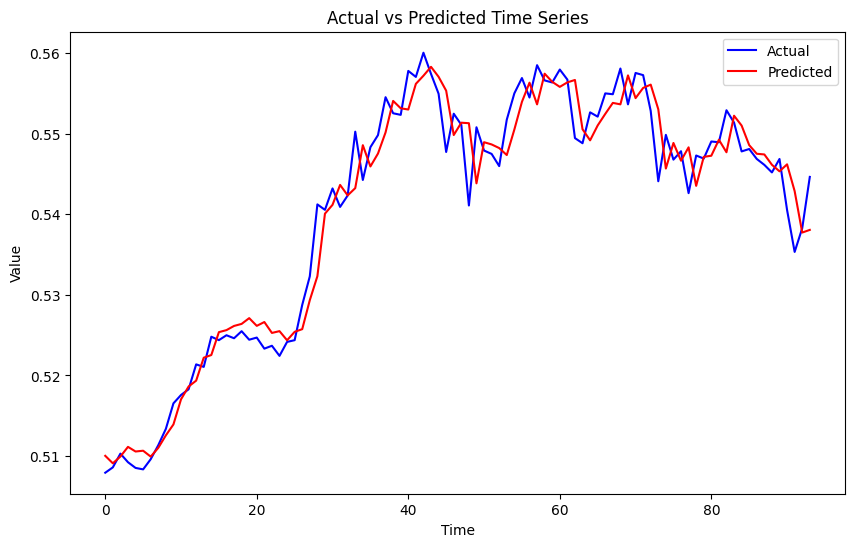

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.8765e-06 - mean_absolute_error: 0.0023  
Model Number of Layers: 3, activation : tanh
Validation Loss: 1.1229667506995611e-05
Validation Mean Absolute Error: 0.002493354259058833
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step


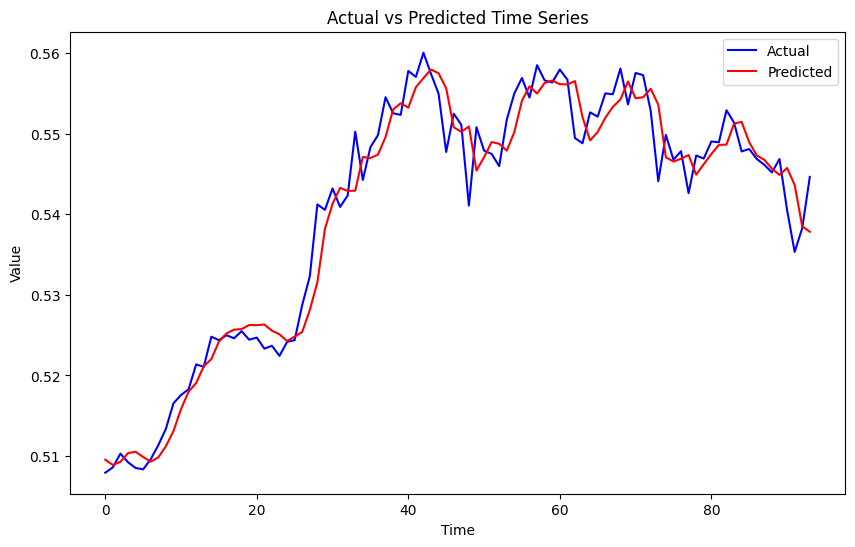

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.8549e-06 - mean_absolute_error: 0.0024 
Model Number of Layers: 4, activation : tanh
Validation Loss: 1.1632201676547993e-05
Validation Mean Absolute Error: 0.0025774159003049135
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step


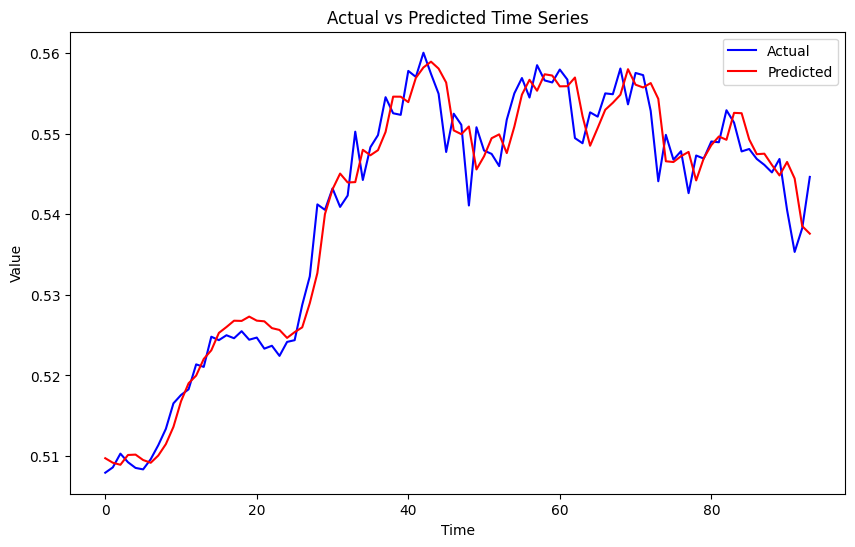

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.0905e-04 - mean_absolute_error: 0.0083 
Model Number of Layers: 5, activation : tanh
Validation Loss: 0.00014092419587541372
Validation Mean Absolute Error: 0.009999742731451988
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 321ms/step


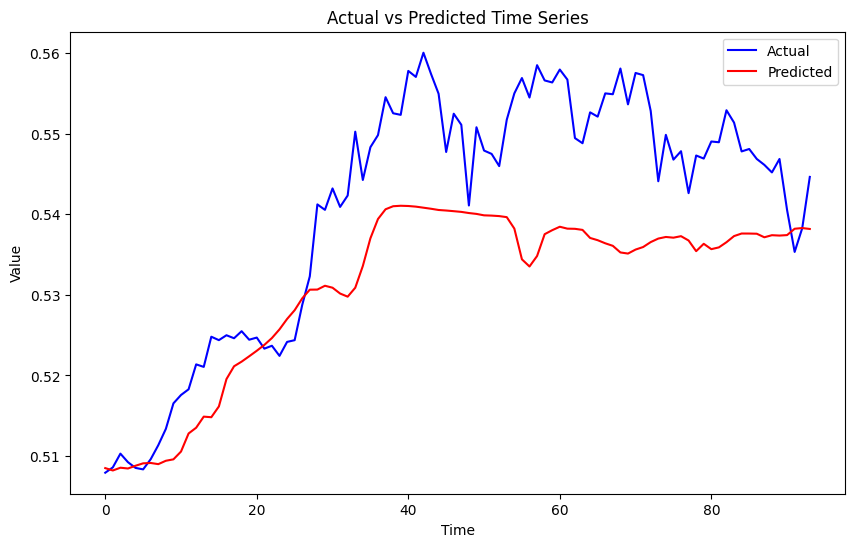

Best model found:
Number of Layers: 3
Units: 50
Activation: tanh
Validation Loss: 1.1229667506995611e-05


In [15]:
from keras.models import load_model

import itertools

activations = ['relu', 'tanh']
num_of_layers = [0, 1, 2, 3,4,5]
units = 50

smallest_error = float('inf')  # Initialize smallest error to positive infinity
best_model_info = None

# Loop over the combinations
for activation, num_layers in itertools.product(activations, num_of_layers):
    model_name = f'best_model_SimpleRNN_{num_layers}_{units}_{activation}.keras'
    loaded_model = load_model(model_name) 
    loss, mae = loaded_model.evaluate(X_valid, y_valid)
    print(f"Model Number of Layers: {num_layers}, activation : {activation}")
    print("Validation Loss:", loss)
    print("Validation Mean Absolute Error:", mae)
    
    # Check if current model has smallest error
    if loss < smallest_error:
        smallest_error = loss
        best_model_info = (num_layers, units, activation)
    
    y_pred = loaded_model.predict(X_valid)
    # Assuming timestamps are available for both y_pred and y_valid
    timestamps = range(len(y_valid))
    # Plot y_pred vs y_valid
    plt.figure(figsize=(10, 6))
    plt.plot(timestamps, y_valid, label='Actual', color='blue')
    plt.plot(timestamps, y_pred, label='Predicted', color='red')
    plt.title('Actual vs Predicted Time Series')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

print("Best model found:")
print("Number of Layers:", best_model_info[0])
print("Units:", best_model_info[1])
print("Activation:", best_model_info[2])
print("Validation Loss:", smallest_error)

In [16]:

from itertools import product


activations = [best_model_info[2]]
num_of_layers = [best_model_info[0]]
units = [25, 50, 100, 150]
dropout_rate = 0.2
epochs = 1000

# Loop over the combinations
for activation, num_layers in product(activations, num_of_layers):
    for unit in units:
        print(f"Training Neural Network: Activation={activation}, Num Layers={num_layers}, Units={unit}")
        history_file_path = f'training_history_{num_layers}_{unit}_{activation}.csv'
        if os.path.exists(history_file_path):
            print(f"Training history already exists for Activation={activation}, Num Layers={num_layers}, Units={unit}. Skipping...")
            continue

        # Initialize the model
        regressor = Sequential()

        # Add SimpleRNN layers
        regressor.add(SimpleRNN(units=unit, input_shape=(X_train.shape[1], 1), activation=activation, return_sequences=True))
        regressor.add(Dropout(dropout_rate))

        for _ in range(num_layers - 1):
            regressor.add(SimpleRNN(units=unit, activation=activation, return_sequences=True))
            regressor.add(Dropout(dropout_rate))

        regressor.add(SimpleRNN(units=unit, activation=activation))
        regressor.add(Dropout(dropout_rate))

        # Add output layer
        regressor.add(Dense(units=1))

        # Compile the model
        optimizer = Adam()
        regressor.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[MeanAbsoluteError()])

        # Define a ModelCheckpoint callback to save the best model
        checkpoint = ModelCheckpoint(f'best_model_SimpleRNN_{num_layers}_{unit}_{activation}.keras', monitor='val_mean_absolute_error', mode='min', save_best_only=True)

        # Fit the model
        progress_bar = tqdm(total=epochs, desc=f"Progress: Activation={activation}, Num Layers={num_layers}, Units={unit}", position=0, leave=True)
        for epoch in range(epochs):
            history = regressor.fit(X_train, y_train, epochs=1, batch_size=64, validation_data=(X_valid, y_valid), verbose=0, callbacks=[checkpoint])
            progress_bar.update(1)  # Update the progress bar
            progress_bar.set_postfix(loss=history.history['loss'][0], val_loss=history.history['val_loss'][0])
        progress_bar.close()

        # Save training history
        history_df = pd.DataFrame({
            'epoch': range(1, len(history.history['loss']) + 1),
            'loss': history.history['loss'],
            'val_loss': history.history['val_loss'],
            'mean_absolute_error': history.history['mean_absolute_error'],
            'val_mean_absolute_error': history.history['val_mean_absolute_error']
        })
        history_df.to_csv(f'training_history_{num_layers}_{unit}_{activation}.csv', index=False)


Training Neural Network: Activation=tanh, Num Layers=3, Units=25


Progress: Activation=tanh, Num Layers=3, Units=25: 100%|██████████| 1000/1000 [11:54<00:00,  1.40it/s, loss=1.12e-5, val_loss=3.3e-5]  


Training Neural Network: Activation=tanh, Num Layers=3, Units=50
Training history already exists for Activation=tanh, Num Layers=3, Units=50. Skipping...
Training Neural Network: Activation=tanh, Num Layers=3, Units=100


Progress: Activation=tanh, Num Layers=3, Units=100: 100%|██████████| 1000/1000 [15:22<00:00,  1.08it/s, loss=7.13e-6, val_loss=1.39e-5] 


Training Neural Network: Activation=tanh, Num Layers=3, Units=150


Progress: Activation=tanh, Num Layers=3, Units=150: 100%|██████████| 1000/1000 [15:05<00:00,  1.10it/s, loss=0.000383, val_loss=0.00465]


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step
Model Number of Layers: 3, Units: 25, Activation: tanh
Validation Mean Absolute Error: 0.002663651
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step
Model Number of Layers: 3, Units: 50, Activation: tanh
Validation Mean Absolute Error: 0.0024933543
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 262ms/step
Model Number of Layers: 3, Units: 100, Activation: tanh
Validation Mean Absolute Error: 0.0025403893
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step
Model Number of Layers: 3, Units: 150, Activation: tanh
Validation Mean Absolute Error: 0.0052735484
Best model found:
Number of Layers: 3
Units: 50
Activation: tanh
Smallest Validation Mean Absolute Error: 0.0024933543


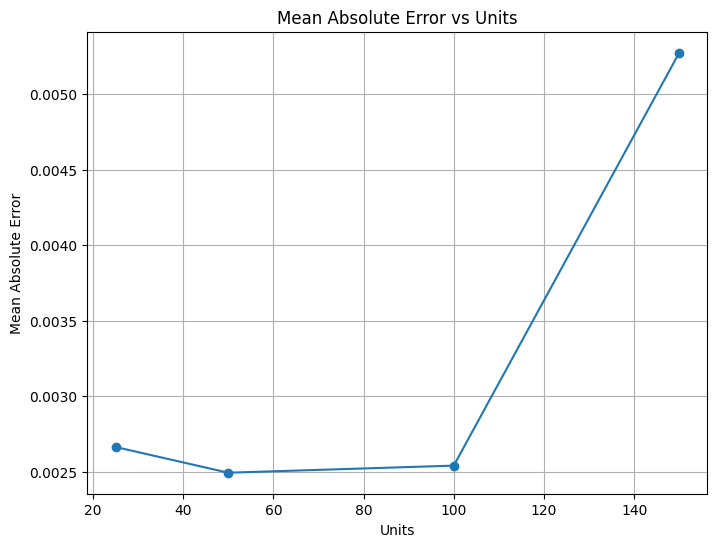

In [22]:
import itertools
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import MeanAbsoluteError


num_of_layers = num_of_layers
units = [25, 50, 100, 150]

smallest_error = float('inf')  # Initialize smallest error to positive infinity
best_model_info = None
mae_values = []  # Store MAE values for plotting
unit_values = []  # Store unit values for plotting

# Loop over the combinations
for activation, num_layers in itertools.product(activations, num_of_layers):
    for unit in units:
        model_name = f'best_model_SimpleRNN_{num_layers}_{unit}_{activation}.keras'
        loaded_model = load_model(model_name) 
        y_pred = loaded_model.predict(X_valid)
        mae_metric = MeanAbsoluteError()
        mae_metric.update_state(y_valid, y_pred)
        mae = mae_metric.result().numpy()  # Extract MAE value
        mae_values.append(mae)
        unit_values.append(unit)
        print(f"Model Number of Layers: {num_layers}, Units: {unit}, Activation: {activation}")
        print("Validation Mean Absolute Error:", mae)
        if mae < smallest_error:
            smallest_error = mae
            best_model_info = (num_layers, unit, activation)

print("Best model found:")
print("Number of Layers:", best_model_info[0])
print("Units:", best_model_info[1])
print("Activation:", best_model_info[2])
print("Smallest Validation Mean Absolute Error:", smallest_error) 

# Plot MAE vs Units
plt.figure(figsize=(8, 6))
plt.plot(unit_values, mae_values, marker='o', linestyle='-')
plt.title('Mean Absolute Error vs Units')
plt.xlabel('Units')
plt.ylabel('Mean Absolute Error')
plt.grid(True)
plt.show()